# Diagnosing Heart Disease

## Database contains 76 attributes where we have found any other trends in the heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Upload data

In [2]:
dt = pd.read_csv("../input/heart.csv")

### Show the first ten attributes.

In [3]:
dt.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Types of data.

In [4]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### we separate the predicts

In [5]:
predicts = dt.iloc[:, 0:13].values

### we separate the class

In [6]:
cla = dt.iloc[:,13].values

### Training

In [7]:
from sklearn.model_selection import train_test_split
predicts_train, predicts_test, class_train, class_test = train_test_split(predicts, cla, test_size=0.2, random_state=42)

# Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(predicts_train, class_train)
predicts_NB = classifier_NB.predict(predicts_test)

### Confusion table Naive Bayes

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
predict_NB = accuracy_score(class_test, predicts_NB)

In [10]:
matriz_NB = confusion_matrix(class_test, predicts_NB)

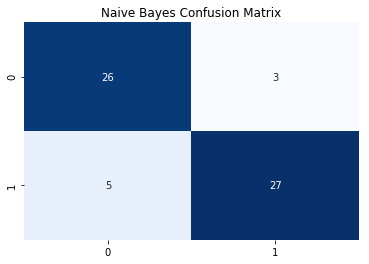

In [11]:
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(matriz_NB,annot=True,cmap="Blues",fmt="d",cbar=False)

### Result Naive Bayes

In [12]:
print(predict_NB)

0.8688524590163934


# Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier_Tree = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifier_Tree.fit(predicts_train, class_train)
predicts_Tree = classifier_Tree.predict(predicts_test)

### Confusion table Tree Classifier

In [14]:
predict_Tree = accuracy_score(class_test, predicts_Tree)

In [15]:
matriz_Tree = confusion_matrix(class_test, predicts_Tree)

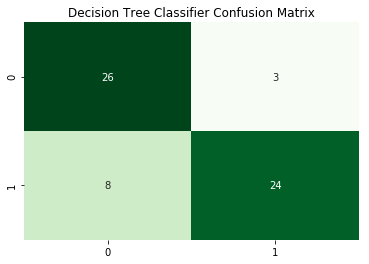

In [16]:
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(matriz_Tree,annot=True,cmap="Greens",fmt="d",cbar=False)

### Result Tree Classifier

In [17]:
print(predict_Tree)

0.819672131147541


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=10, criterion= 'entropy', random_state=0)
classifier_RF.fit(predicts_train, class_train)
predicts_RF= classifier_RF.predict(predicts_test)

### Confusion table Random Forest

In [19]:
predict_RF = accuracy_score(class_test, predicts_RF)

In [20]:
matriz_RF = confusion_matrix(class_test, predicts_RF)

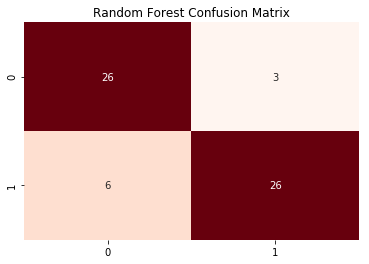

In [21]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(matriz_RF,annot=True,cmap="Reds",fmt="d",cbar=False)

### Result Random Forest

In [22]:
print(predict_RF)

0.8524590163934426


# KNN

### OneHotEncoder

In [23]:
predicts_enc = dt.iloc[:, 0:13].values

In [24]:
cla_enc = dt.iloc[:,13].values

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
labelencoder_predicts = LabelEncoder()
predicts_enc[:,1] =  labelencoder_predicts.fit_transform(predicts_enc[:,1])
predicts_enc[:,2] =  labelencoder_predicts.fit_transform(predicts_enc[:,2])
predicts_enc[:,3] =  labelencoder_predicts.fit_transform(predicts_enc[:,3])
predicts_enc[:,4] =  labelencoder_predicts.fit_transform(predicts_enc[:,4])
predicts_enc[:,5] =  labelencoder_predicts.fit_transform(predicts_enc[:,5])
predicts_enc[:,6] =  labelencoder_predicts.fit_transform(predicts_enc[:,6])
predicts_enc[:,7] =  labelencoder_predicts.fit_transform(predicts_enc[:,7])
predicts_enc[:,8] =  labelencoder_predicts.fit_transform(predicts_enc[:,8])
predicts_enc[:,9] =  labelencoder_predicts.fit_transform(predicts_enc[:,9])
predicts_enc[:,10] =  labelencoder_predicts.fit_transform(predicts_enc[:,10])
predicts_enc[:,11] =  labelencoder_predicts.fit_transform(predicts_enc[:,11])
predicts_enc[:,12] =  labelencoder_predicts.fit_transform(predicts_enc[:,12])

In [26]:
onehotencode = OneHotEncoder(categories='auto')
predicts_enc = onehotencode.fit_transform(predicts_enc).toarray()

In [27]:
labelencoder_cla_enc = LabelEncoder()
cla_enc = labelencoder_cla_enc.fit_transform(cla_enc)

### Training LabelEncoder

In [28]:
predicts_train_enc, predicts_test_enc, class_train_enc, class_test_enc = train_test_split(predicts_enc, cla_enc, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_KNN.fit(predicts_train_enc, class_train_enc)
predicts_KNN = classifier_KNN.predict(predicts_test_enc)

### Confusion table KNN

In [30]:
predict_KNN = accuracy_score(class_test_enc, predicts_KNN)

In [31]:
matriz_KNN = confusion_matrix(class_test_enc, predicts_KNN)

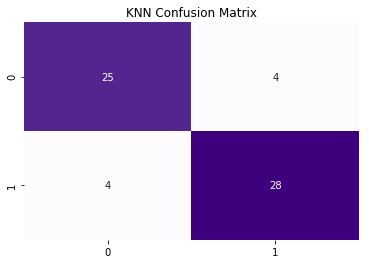

In [32]:
plt.title("KNN Confusion Matrix")
sns.heatmap(matriz_KNN,annot=True,cmap="Purples",fmt="d",cbar=False)

### Result KNN

In [33]:
print(predict_KNN)

0.8688524590163934


# Regression (best result using scaling)

In [34]:
from sklearn.linear_model import LogisticRegression
classifier_Regression = LogisticRegression(solver = 'lbfgs')
classifier_Regression.fit(predicts_train_enc, class_train_enc)
predicts_Regression = classifier_Regression.predict(predicts_test_enc)

### Confusion table Regression

In [35]:
predict_Regression = accuracy_score(class_test_enc, predicts_Regression)

In [36]:
matriz_Regression = confusion_matrix(class_test_enc, predicts_Regression)

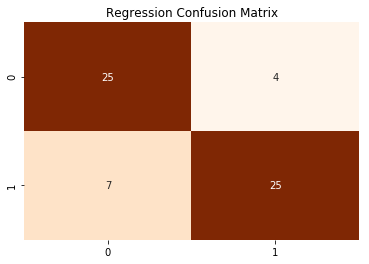

In [37]:
plt.title("Regression Confusion Matrix")
sns.heatmap(matriz_Regression,annot=True,cmap="Oranges",fmt="d",cbar=False)

### Result Regression

In [38]:
print(predict_Regression)

0.819672131147541


# SVM (best result using scaling)

In [39]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel='linear', random_state=1)
classifier_SVM.fit(predicts_train_enc, class_train_enc)
predicts_SVM = classifier_Regression.predict(predicts_test_enc)

### Confusion table SVM

In [40]:
predict_SVM = accuracy_score(class_test_enc, predicts_SVM)

In [41]:
matriz_SVM = confusion_matrix(class_test_enc, predicts_SVM)

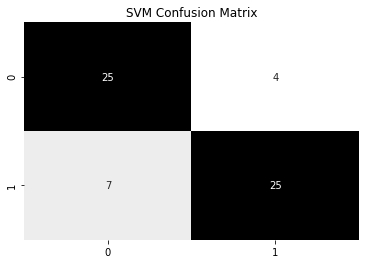

In [42]:
plt.title("SVM Confusion Matrix")
sns.heatmap(matriz_SVM,annot=True,cmap="Greys",fmt="d",cbar=False)

### Result SVM

In [43]:
print(predict_SVM)

0.819672131147541


## Neural Networks 

In [44]:
from sklearn.neural_network import MLPClassifier
classifier_Neural = MLPClassifier(verbose=True, max_iter=2000, tol=0.00002)
classifier_Neural.fit(predicts_train_enc, class_train_enc)
predicts_Neural = classifier_Neural.predict(predicts_test_enc)

Iteration 1, loss = 0.67218146
Iteration 2, loss = 0.64345194
Iteration 3, loss = 0.61828724
Iteration 4, loss = 0.59456105
Iteration 5, loss = 0.57226638
Iteration 6, loss = 0.55148113
Iteration 7, loss = 0.53019816
Iteration 8, loss = 0.51030605
Iteration 9, loss = 0.49102647
Iteration 10, loss = 0.47164081
Iteration 11, loss = 0.45329532
Iteration 12, loss = 0.43487474
Iteration 13, loss = 0.41734112
Iteration 14, loss = 0.40009856
Iteration 15, loss = 0.38368339
Iteration 16, loss = 0.36751395
Iteration 17, loss = 0.35262842
Iteration 18, loss = 0.33879819
Iteration 19, loss = 0.32551652
Iteration 20, loss = 0.31293194
Iteration 21, loss = 0.30107876
Iteration 22, loss = 0.28946105
Iteration 23, loss = 0.27868957
Iteration 24, loss = 0.26837454
Iteration 25, loss = 0.25799968
Iteration 26, loss = 0.24872856
Iteration 27, loss = 0.24006092
Iteration 28, loss = 0.23189500
Iteration 29, loss = 0.22400658
Iteration 30, loss = 0.21637140
Iteration 31, loss = 0.20890248
Iteration 32, los

### Confusion table Neural Networks

In [45]:
predict_Neural = accuracy_score(class_test_enc, predicts_Neural)

In [46]:
matriz_Neural = confusion_matrix(class_test_enc, predicts_Neural)

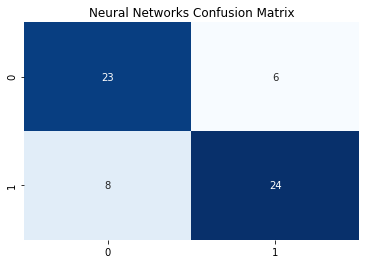

In [47]:
plt.title("Neural Networks Confusion Matrix")
sns.heatmap(matriz_Neural,annot=True,cmap="Blues",fmt="d",cbar=False)

### Result Neural Networks

In [48]:
print(predict_Neural)

0.7704918032786885


# Neural Networks - Keras

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [50]:
classifier_Neural_Keras = Sequential()
classifier_Neural_Keras.add(Dense(units = 5, activation = 'relu', input_dim = 398))

Instructions for updating:
Colocations handled automatically by placer.


In [51]:
classifier_Neural_Keras.add(Dense(units = 5, activation = 'relu'))
classifier_Neural_Keras.add(Dense(units = 1, activation = 'sigmoid'))

In [52]:
classifier_Neural_Keras.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [53]:
classifier_Neural_Keras.fit(predicts_train_enc, class_train_enc, batch_size = 8, epochs = 40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
242/242 [==============================] - 1s 3ms/step - loss: 0.6771 - acc: 0.6322
Epoch 2/40
242/242 [==============================] - 0s 157us/step - loss: 0.6402 - acc: 0.7190
Epoch 3/40
242/242 [==============================] - 0s 158us/step - loss: 0.5808 - acc: 0.8017
Epoch 4/40
242/242 [==============================] - 0s 158us/step - loss: 0.5078 - acc: 0.8636
Epoch 5/40
242/242 [==============================] - 0s 160us/step - loss: 0.4343 - acc: 0.9008
Epoch 6/40
242/242 [==============================] - 0s 159us/step - loss: 0.3781 - acc: 0.9008
Epoch 7/40
242/242 [==============================] - 0s 164us/step - loss: 0.3296 - acc: 0.9132
Epoch 8/40
242/242 [==============================] - 0s 161us/step - loss: 0.2914 - acc: 0.9174
Epoch 9/40
242/242 [==============================] - 0s 159us/step - loss: 0.2592 - acc: 0.9298
Epoch 10/40
242/242 [==============================] - 0s 177us/step - loss: 0.23

In [54]:
predicts_Neural_Keras = classifier_Neural_Keras.predict(predicts_test_enc)

### Confusion table Neural Networks - Keras

In [55]:
predict_Neural_Keras = accuracy_score(class_test_enc, predicts_Neural_Keras.round())

In [56]:
matriz_Neural_Keras = confusion_matrix(class_test_enc, predicts_Neural_Keras.round())

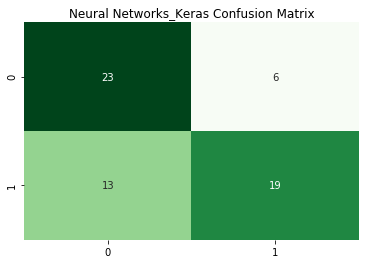

In [57]:
plt.title("Neural Networks_Keras Confusion Matrix")
sns.heatmap(matriz_Neural_Keras,annot=True,cmap="Greens",fmt="d",cbar=False)

### Result Neural Networks Keras

In [58]:
print(predict_Neural_Keras)

0.6885245901639344


## Graph of Algorithms

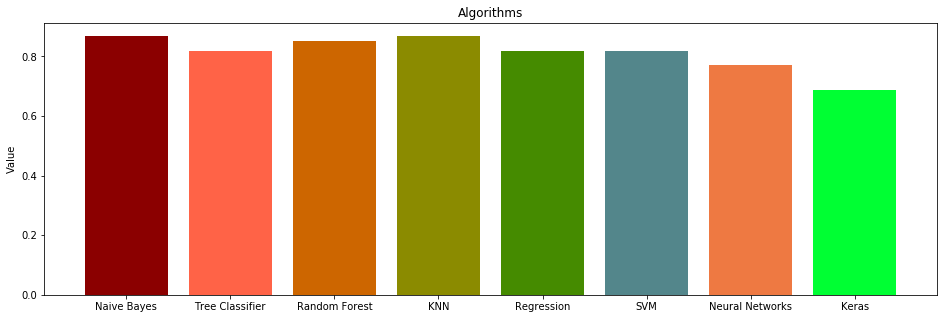

In [59]:
plt.rcParams['figure.figsize'] = (16,5)
names_alg = ['Naive Bayes', 'Tree Classifier', 'Random Forest', 'KNN', 'Regression', 'SVM', 'Neural Networks', 'Keras']
result_alg = [predict_NB, predict_Tree, predict_RF, predict_KNN, predict_Regression, predict_SVM, predict_Neural, predict_Neural_Keras]
xs = [i + 0.5 for i, _ in enumerate(names_alg)]
plt.bar(xs,result_alg, color=('#8B0000','#FF6347','#CD6600','#8B8B00','#458B00','#53868B','#EE7942','#00FF33'))
plt.ylabel("Value")
plt.title("Algorithms")
plt.xticks([i + 0.5 for i, _ in enumerate(names_alg)], names_alg)
plt.show()